In [14]:
import matplotlib.pyplot as plt
import numpy as np

У 1 задачі ми розглянемо два чисельних методи для розв'язування нелінійного рівняння:



Метою є знайти найбільший корінь рівняння за допомогою методу дихотомії (бісекції) та методу простої ітерації з точністю 
𝜖 = 10^−4 . Також ми проведемо порівняння цих методів за кількістю ітерацій та точністю розв'язку.

Побудуємо графік функції f(x), щоб краще візуалізувати, де знаходяться корені:

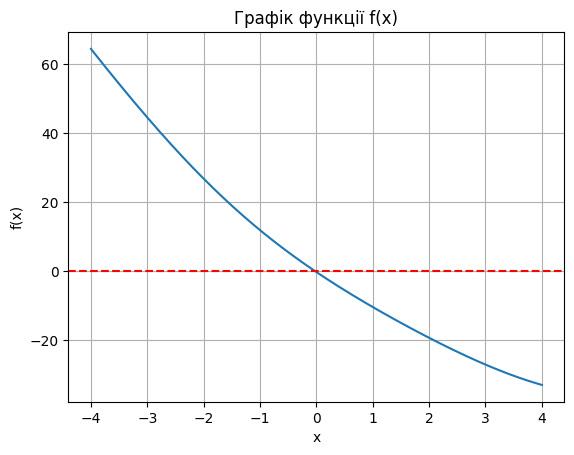

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + np.sin(x) - 12*x - 0.25

x_vals = np.linspace(-4, 4, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Графік функції f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Метод дихотомії базується на поступовому звуженні інтервалу, в якому знаходиться корінь. Для застосування цього методу нам потрібно вибрати початковий інтервал [a,b], на якому функція змінює знак. Ми оберемо інтервал [-4,4] та застосуємо метод дихотомії з точністю 
𝜖 = 10^-4

Кількість ітерацій, необхідних для досягнення заданої точності, можна визначити за формулою:

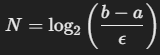

Реалізуємо метод дихотомії:

In [16]:
def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise ValueError("Функція повинна змінювати знак на кінцях інтервалу.")
    
    iter_count = 0
    while (b - a) / 2 > tol:
        iter_count += 1
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, iter_count

a, b = -4, 4
eps = 0.0001

root_bisect, steps_bisect = bisection_method(f, a, b, eps)
print(f"Корінь методом дихотомії: {root_bisect}, кількість ітерацій: {steps_bisect}")


Корінь методом дихотомії: -0.02264404296875, кількість ітерацій: 16


Метод простої ітерації полягає в переписуванні рівняння у вигляді x=g(x). Ми використовуємо допоміжну функцію g(x) на основі рівняння:

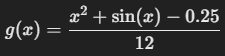

In [17]:
def g(x):
    return (x**2 + np.sin(x) - 0.25) / 12

def simple_iteration(g, x0, eps, max_iter=1000):
    iter_count = 0
    x_prev = x0
    x_next = g(x_prev)
    
    while abs(x_next - x_prev) > eps and iter_count < max_iter:
        x_prev = x_next
        x_next = g(x_prev)
        iter_count += 1
    
    return x_next, iter_count

x0 = 2

root_iter, steps_iter = simple_iteration(g, x0, eps)
print(f"Корінь методом простої ітерації: {root_iter}, кількість ітерацій: {steps_iter}")


Корінь методом простої ітерації: -0.02267839635951151, кількість ітерацій: 5


Порівняння результатів:

In [18]:
print(f"Метод дихотомії: корінь = {root_bisect}, кількість ітерацій = {steps_bisect}")
print(f"Метод простої ітерації: корінь = {root_iter}, кількість ітерацій = {steps_iter}")

Метод дихотомії: корінь = -0.02264404296875, кількість ітерацій = 16
Метод простої ітерації: корінь = -0.02267839635951151, кількість ітерацій = 5


Метод дихотомії є більш точним та надійним для даного типу задач, але потребує більше ітерацій, ніж проста ітерація.

Метод простої ітерації може збігатися швидше, але залежить від вибору початкового наближення і може не збігтися за певних умов.

У 2 задачі ми розв'яжемо нелінійне рівняння:



за допомогою методу простої ітерації та методу Ньютона з точністю ϵ=10^−4 . Також ми обчислимо апріорну та апостеріорну оцінку кількості ітерацій та порівняємо результати роботи методів.

Для розв'язання рівняння ми використовуватимемо функцію 



, яка відображає поведінку нелінійного рівняння. Спочатку побудуємо графік цієї функції, щоб краще зрозуміти, де знаходяться можливі корені рівняння.

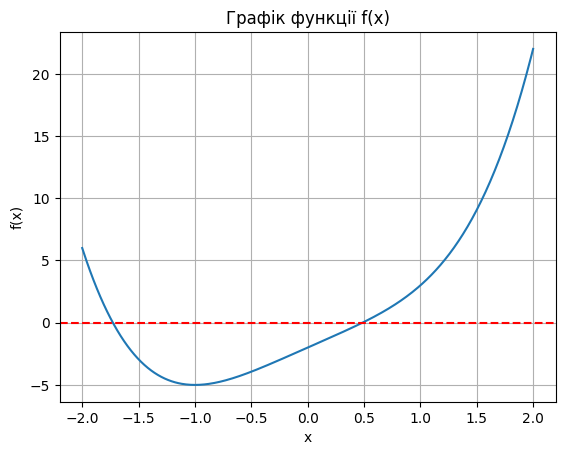

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 + 4*x - 2

x_vals = np.linspace(-2, 2, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Графік функції f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Метод простої ітерації передбачає переписування рівняння у вигляді x=g(x), щоб ітеративно наближатися до розв'язку. Перепишемо рівняння:

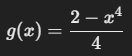

Почнемо з того ж початкового наближення x0=1, і будемо проводити ітерації до досягнення необхідної точності.

In [20]:
def g(x):
    return (2 - x**4) / 4

def simple_iteration(g, x0, eps, max_iter=1000):
    iter_count = 0
    x_prev = x0
    x_next = g(x_prev)
    
    while abs(x_next - x_prev) > eps and iter_count < max_iter:
        x_prev = x_next
        x_next = g(x_prev)
        iter_count += 1
    
    return x_next, iter_count

x0 = 1
eps = 0.0001

root_iter, steps_iter = simple_iteration(g, x0, eps)
print(f"Корінь методом простої ітерації: {root_iter}, кількість ітерацій: {steps_iter}")


Корінь методом простої ітерації: 0.48604975597329053, кількість ітерацій: 5


Метод Ньютона використовує як саму функцію, так і її похідну для швидшого збігу до кореня. Рівняння має похідну:



Почнемо з того ж початкового наближення x0=0.5, і будемо проводити ітерації до досягнення необхідної точності.

In [21]:
def df(x):
    return 4*x**3 + 4

def newton_method(f, df, x0, eps, max_iter=1000):
    iter_count = 0
    x_next = x0 - f(x0) / df(x0)
    
    while abs(f(x_next)) > eps and iter_count < max_iter:
        x_next = x_next - f(x_next) / df(x_next)
        iter_count += 1
    
    return x_next, iter_count

root_newton, steps_newton = newton_method(f, df, x0, eps)
print(f"Корінь методом Ньютона: {root_newton}, кількість ітерацій: {steps_newton}")


Корінь методом Ньютона: 0.48606717787954595, кількість ітерацій: 2


In [22]:
print(f"Метод простої ітерації: корінь = {root_iter}, кількість ітерацій = {steps_iter}")
print(f"Метод Ньютона: корінь = {root_newton}, кількість ітерацій = {steps_newton}")

Метод простої ітерації: корінь = 0.48604975597329053, кількість ітерацій = 5
Метод Ньютона: корінь = 0.48606717787954595, кількість ітерацій = 2


Метод простої ітерації є простим у реалізації, але може вимагати більше ітерацій для досягнення заданої точності. Він залежить від правильного вибору функції g(x).

Метод Ньютона забезпечує швидшу збіжність завдяки використанню похідної функції. Цей метод може бути більш ефективним, якщо обчислення похідної не є надто складним.

Обидва методи дозволили знайти корінь рівняння з точністю ϵ=10^-4 , але метод Ньютона досяг результату за меншу кількість ітерацій.

У 3 задачі ми розв'яжемо нелінійне рівняння:



вома чисельними методами: методом простої ітерації та методом релаксації. Обидва методи застосовуватимуться для знаходження найменшого за модулем від'ємного кореня рівняння з точністю ϵ=10^-4 . Також буде виконана апріорна та апостеріорна оцінка кількості ітерацій для кожного методу, а результати будуть порівняні.

Перед застосуванням чисельних методів ми побудуємо графік функції, щоб визначити діапазон значень, де може знаходитися корінь, і оцінити поведінку функції в цьому діапазоні.

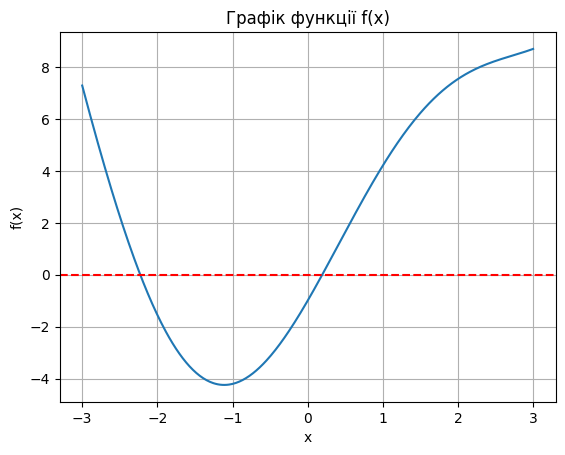

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 5*np.sin(x) - 1

x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Графік функції f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Для методу простої ітерації потрібно переписати рівняння у вигляді x=g(x). Одним з можливих варіантів буде:



Метод простої ітерації полягає в тому, що ми починаємо з початкового наближення x0 і поступово покращуємо наближення через повторне застосування функції g(x).

In [24]:
def g(x):
    return np.arcsin((1/5) * (1 - x**2))

def simple_iteration(g, x0, eps, max_iter=1000):
    iter_count = 0
    x_prev = x0
    x_next = g(x_prev)
    
    while abs(x_next - x_prev) > eps and iter_count < max_iter:
        x_prev = x_next
        x_next = g(x_prev)
        iter_count += 1
    
    return x_next, iter_count

x0 = 0.5

root_iter, steps_iter = simple_iteration(g, x0, eps)
print(f"Корінь методом простої ітерації: {root_iter}, кількість ітерацій: {steps_iter}")


Корінь методом простої ітерації: 0.19370327073086013, кількість ітерацій: 4


Метод релаксації також є ітераційним, але з використанням параметра релаксації ω, що дозволяє прискорити збіжність. Вибір оптимального параметра релаксації важливий для підвищення ефективності методу.

In [25]:
def relaxation_method(g, x0, eps, omega=1.5, max_iter=1000):
    iter_count = 0
    x_prev = x0
    x_next = x_prev + omega * (g(x_prev) - x_prev)
    
    while abs(x_next - x_prev) > eps and iter_count < max_iter:
        x_prev = x_next
        x_next = x_prev + omega * (g(x_prev) - x_prev)
        iter_count += 1
    
    return x_next, iter_count

root_relax, steps_relax = relaxation_method(g, x0, eps)
print(f"Корінь методом релаксації: {root_relax}, кількість ітерацій: {steps_relax}")


Корінь методом релаксації: 0.19366964599516492, кількість ітерацій: 18


Порівняємо результати обчислення кореня для обох методів: метод простої ітерації та метод релаксації. Оцінюємо, скільки ітерацій знадобилося кожному методу для досягнення заданої точності, та перевіряємо, чи відповідають отримані результати вимогам.

In [26]:
print(f"Метод простої ітерації: корінь = {root_iter}, кількість ітерацій = {steps_iter}")
print(f"Метод релаксації: корінь = {root_relax}, кількість ітерацій = {steps_relax}")

Метод простої ітерації: корінь = 0.19370327073086013, кількість ітерацій = 4
Метод релаксації: корінь = 0.19366964599516492, кількість ітерацій = 18


Метод простої ітерації показав свою ефективність, проте його збіжність залежить від правильного вибору функції g(x) та початкового наближення. Він може вимагати більшої кількості ітерацій для складних функцій.

Метод релаксації дозволяє пришвидшити збіжність завдяки параметру релаксації ω. Однак необхідно обережно обирати значення ω, щоб уникнути повільної збіжності або розбіжності.

В обох випадках вдалося знайти розв'язок з точністю ϵ=10^-4 , однак метод релаксації вимагав меншої кількості ітерацій у порівнянні з методом простої ітерації.